In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from blendhunter.config import BHConfig

In [2]:
bhconfig = BHConfig(config_file='../data/bhconfig.yml').config
out_path = bhconfig['out_path']
noise_sigma = bhconfig['noise_sigma']
n_noise_real = bhconfig['n_noise_real']

In [3]:
labels = np.load(os.path.join(out_path, 'bh_pad50/BlendHunterData/test/test/labels.npy')).flatten()

In [4]:
def get_acc(dir_name, out_path=out_path, noise_sigma=noise_sigma, n_noise_real=n_noise_real, 
            labels=labels, ext='.npy'):
    
    path = os.path.join(out_path, dir_name)
    load = lambda x: np.load(x, allow_pickle=True)
    file_list = os.listdir(path)
    
    prefix = ''.join([char for char in file_list[0] if not char.isdigit()]).rstrip(ext)
    
    if 'sep' in dir_name:
        labels = np.array(labels == 'blended').astype(int)
    
    acc_res = []
    
    for sigma in noise_sigma:
        
        acc_real = []
        
        for noise_real in range(n_noise_real): 
            
            id = f'{str(sigma)}{str(noise_real)}'
            file_name = f'{prefix}{id}{ext}'
            res = load(os.path.join(path, file_name))
                        
            acc = np.sum(np.array(res == labels).astype(int).flatten()) / res.size            
            acc_real.append(acc)
        
        acc_res.append(acc_real)
        
    return np.mean(acc_res, axis=1), np.std(acc_res, axis=1)

In [5]:
bh_mean, bh_std = get_acc('bh_pad_results')
sep_mean, sep_std = get_acc('sep_pad_results')

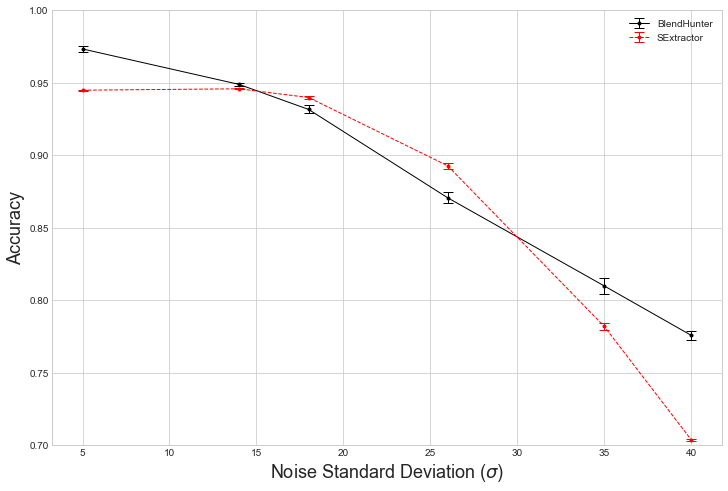

In [6]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(12, 8))
plt.errorbar(noise_sigma, bh_mean, yerr=bh_std, color='k', marker='.', linestyle='-', linewidth=1,
             capsize=5, label='BlendHunter')
plt.errorbar(noise_sigma, sep_mean, yerr=sep_std, color='red', marker='.', linestyle='--', linewidth=1,
             capsize=5, label='SExtractor')
plt.xlabel('Noise Standard Deviation ($\sigma$)', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.ylim(0.7, 1)
plt.legend()
plt.show()